# PROV-O Diagram Rendering Example

This example takes a PROV-O activity graph and uses the [PROV Python library](https://pypi.python.org/pypi/prov), which is an implementation of the [Provenance Data Model](http://www.w3.org/TR/prov-dm/) by the World Wide Web Consortium, to create a graphical representations like PNG, SVG, PDF.

## Prerequisites

* python libraries - prov[dot]
* jupyter
* graphviz

## Read a simple provenance document

We will use the Example 1 available on https://www.w3.org/TR/prov-o/ e.g. https://www.w3.org/TR/prov-o/#narrative-example-simple-1

To create a provenance document (a package of provenance statements or assertions), import `ProvDocument` class from `prov.model`:

In [2]:
from prov.model import ProvDocument
import prov.model as pm

Create some setup variables filename and basename which will be used for the encoding of the outputs


In [52]:
filename = "rdf/prov-ex1.ttl"
basename = "prov-ex1"

Use the prov library to deserialize the example document

In [53]:
# Create a new provenance document
d1 = pm.ProvDocument.deserialize(filename, format="rdf")

## Graphics export (PNG and PDF)

In addition to the PROV-N output (as above), the document can be exported into a graphical representation with the help of the [GraphViz](http://www.graphviz.org/). It is provided as a software package in popular Linux distributions, or can be [downloaded](http://www.graphviz.org/Download.php) for Windows and Mac.

Once you have GraphViz installed and the `dot` command available in your operating system's paths, you can save the document we have so far into a PNG file as follows.

In [54]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png(basename + '.png')

True

The above saves the PNG file as `article-prov.png` in your current folder. If you're runing this tutorial in Jupyter Notebook, you can see it here as well.

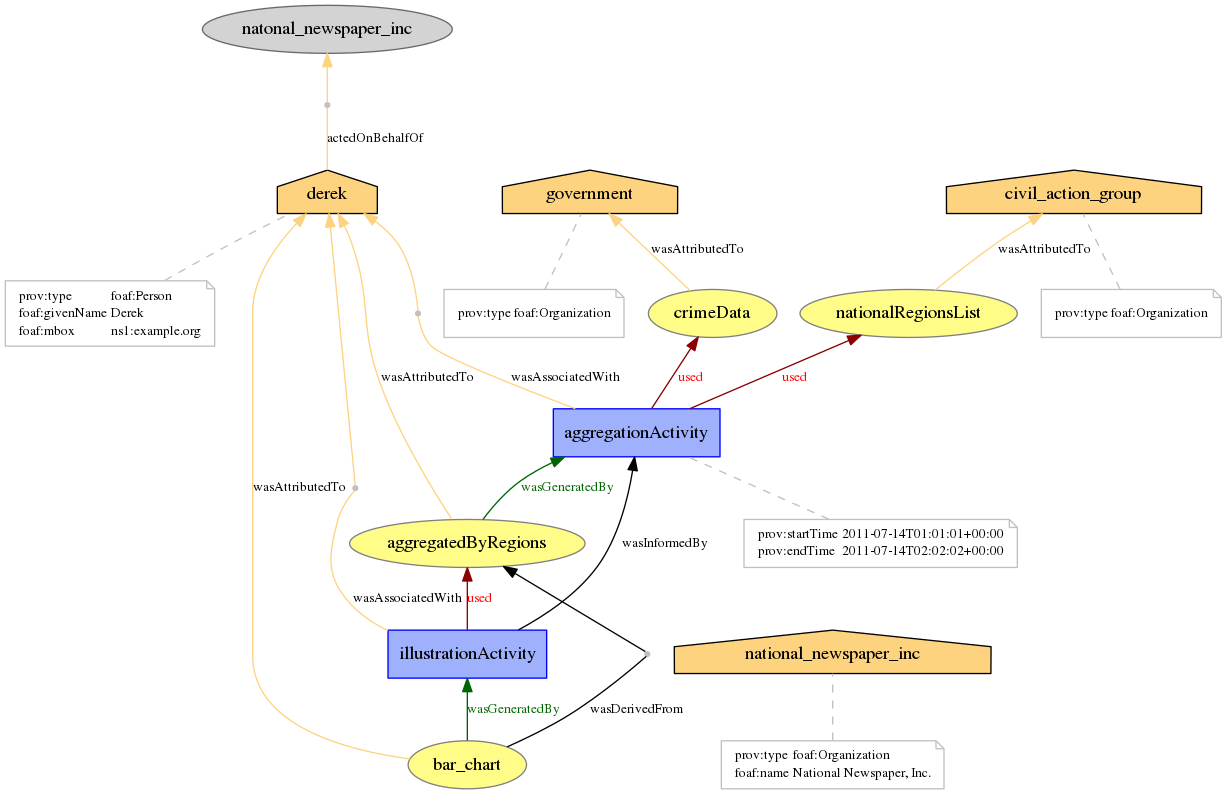

In [55]:
from IPython.display import Image
Image(basename + '.png')

In [56]:
# Or save to a PDF
dot.write_pdf(basename + '.pdf')

True

Similarly, the above saves the document into a PDF file in your current working folder. Graphviz supports a wide ranges of [raster and vector outputs](http://www.graphviz.org/doc/info/output.html), to which you can export your provenance documents created by the library. To find out what formats are available from your version, run `dot -T?` at the command line.

## PROV-JSON export

[PROV-JSON](https://provenance.ecs.soton.ac.uk/prov-json/) is a JSON representation for PROV that was designed for the ease of accessing various PROV elements in a PROV document and to work well with web applications. The format is natively supported by the library and is its default serialisation format.

In [57]:
print(d1.serialize(indent=2))

{
  "used": {
    "_:id3": {
      "prov:entity": "crimeData",
      "prov:activity": "aggregationActivity"
    },
    "_:id11": {
      "prov:entity": "nationalRegionsList",
      "prov:activity": "aggregationActivity"
    },
    "_:id10": {
      "prov:entity": "aggregatedByRegions",
      "prov:activity": "illustrationActivity"
    }
  },
  "actedOnBehalfOf": {
    "_:id1": {
      "prov:delegate": "derek",
      "prov:responsible": "natonal_newspaper_inc"
    }
  },
  "wasAssociatedWith": {
    "_:id2": {
      "prov:agent": "derek",
      "prov:activity": "illustrationActivity"
    },
    "_:id12": {
      "prov:agent": "derek",
      "prov:activity": "aggregationActivity"
    }
  },
  "wasAttributedTo": {
    "_:id7": {
      "prov:entity": "nationalRegionsList",
      "prov:agent": "civil_action_group"
    },
    "_:id6": {
      "prov:entity": "bar_chart",
      "prov:agent": "derek"
    },
    "_:id5": {
      "prov:entity": "aggregatedByRegions",
      "prov:agent": "derek"
 

You can also serialize the document directly to a file by providing a filename (below) or a Python File object.

In [58]:
d1.serialize(basename + '.json')